In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import nltk.classify.util
import re
import string
import nltk
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import warnings
%matplotlib inline
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/EMMADISHETTI TEJASWI/Desktop/project/1429_1.csv")
df.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


In [4]:
dff = df[['reviews.rating' , 'reviews.text' , 'reviews.title' ]]
dff.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [5]:
#Filtering not null values
y_data=dff[dff["reviews.rating"].notnull()]
dff.head()

,reviews.rating,reviews.text,reviews.title
0,5.0,This product so far has not disappointed. My c...,Kindle
1,5.0,great for beginner or experienced person. Boug...,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [12]:
#Classifying text based on review ratings(positive or negative)
y_data["y_data"] = y_data["reviews.rating"]>=4
y_data["y_data"] = y_data["y_data"].replace([True , False] , ["pos" , "neg"])

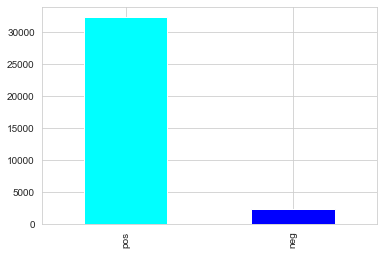

In [7]:
#Count of reviews based on sentiments
y_data["y_data"].value_counts().plot.bar(color=['cyan', 'blue'])

In [8]:

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

y_data["Summary_Clean"] = y_data["reviews.text"].apply(cleanup)

In [9]:
#Splitting training and testing dataset
split = y_data[["Summary_Clean" , "y_data"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [10]:
#BUILDING COUNTER AND TFIDF VECTOR FOR TEST<TRAIN AND CHECK DATA
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test = tfidf_transformer.transform(X_new_counts)

In [11]:
#Fitting Bernouli NB
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,train["y_data"])
y_pred = classifier.predict(X_test)

print(confusion_matrix(test["y_data"], y_pred))
print(classification_report(test["y_data"], y_pred))
# Model Accuracy, how often is the classifier correct?
print("Bernoulli Accuracy:",metrics.accuracy_score(test["y_data"], y_pred)*100)

[[  81  383]
 [ 168 6293]]
              precision    recall  f1-score   support

         neg       0.33      0.17      0.23       464
         pos       0.94      0.97      0.96      6461

    accuracy                           0.92      6925
   macro avg       0.63      0.57      0.59      6925
weighted avg       0.90      0.92      0.91      6925

Bernoulli Accuracy: 92.04332129963899


In [15]:
#Fitting Multinomial NB
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,train["y_data"])
y_pred = classifier.predict(X_test)
print(confusion_matrix(test["y_data"], y_pred))
print(classification_report(test["y_data"], y_pred))
# Model Accuracy, how often is the classifier correct?
print("Multinomial Accuracy:",metrics.accuracy_score(test["y_data"], y_pred)*100)

[[   0  464]
 [   0 6461]]
              precision    recall  f1-score   support

         neg       0.00      0.00      0.00       464
         pos       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925

Multinomial Accuracy: 93.29963898916968


In [16]:
#Fitting Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, train["y_data"])
y_pred = classifier.predict(X_test)
print(confusion_matrix(test["y_data"], y_pred))
print(classification_report(test["y_data"], y_pred))
# Model Accuracy, how often is the classifier correct?
print("Logistic Regression Accuracy:",metrics.accuracy_score(test["y_data"], y_pred)*100)

[[  64  400]
 [  12 6449]]
              precision    recall  f1-score   support

         neg       0.84      0.14      0.24       464
         pos       0.94      1.00      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.89      0.57      0.60      6925
weighted avg       0.93      0.94      0.92      6925

Logistic Regression Accuracy: 94.05054151624549


In [17]:
#Fitting SVM model 
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, train["y_data"])
y_pred = classifier.predict(X_test)
print(confusion_matrix(test["y_data"], y_pred))
print(classification_report(test["y_data"], y_pred))
# Model Accuracy, how often is the classifier correct?
print("SVM Accuracy :",metrics.accuracy_score(test["y_data"], y_pred)*100)

[[  38  426]
 [   7 6454]]
              precision    recall  f1-score   support

         neg       0.84      0.08      0.15       464
         pos       0.94      1.00      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.89      0.54      0.56      6925
weighted avg       0.93      0.94      0.91      6925

SVM Accuracy : 93.74729241877256


In [18]:
# Fitting DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier.fit(X_train , train["y_data"])
y_pred = classifier.predict(X_test)
print(confusion_matrix(test["y_data"], y_pred))
print(classification_report(test["y_data"], y_pred))
# Model Accuracy, how often is the classifier correct?
print("Decision tree Accuracy with gini index:",metrics.accuracy_score(test["y_data"], y_pred)*100)

[[ 134  330]
 [ 281 6180]]
              precision    recall  f1-score   support

         neg       0.32      0.29      0.30       464
         pos       0.95      0.96      0.95      6461

    accuracy                           0.91      6925
   macro avg       0.64      0.62      0.63      6925
weighted avg       0.91      0.91      0.91      6925

Decision tree Accuracy with gini index: 91.17689530685921


In [19]:
#Fitting KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train , train["y_data"])
y_pred = classifier.predict(X_test)
print(confusion_matrix(test["y_data"], y_pred))
print(classification_report(test["y_data"], y_pred))
# Model Accuracy, how often is the classifier correct?
print("KNN Accuracy ",metrics.accuracy_score(test["y_data"], y_pred)*100)

[[   0  464]
 [   1 6460]]
              precision    recall  f1-score   support

         neg       0.00      0.00      0.00       464
         pos       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925

KNN Accuracy  93.28519855595668


In [20]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    DecisionTreeClassifier(), 
    BernoulliNB(),
    KNeighborsClassifier(),
    MultinomialNB(),
    SVC(),
    LogisticRegression(),
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, train["y_data"])
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(test["y_data"], train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

DecisionTreeClassifier
****Results****
Accuracy: 91.2491%
BernoulliNB
****Results****
Accuracy: 92.0433%
KNeighborsClassifier
****Results****
Accuracy: 93.2852%
MultinomialNB
****Results****
Accuracy: 93.2996%
SVC
****Results****
Accuracy: 93.7473%
LogisticRegression
****Results****
Accuracy: 94.0505%


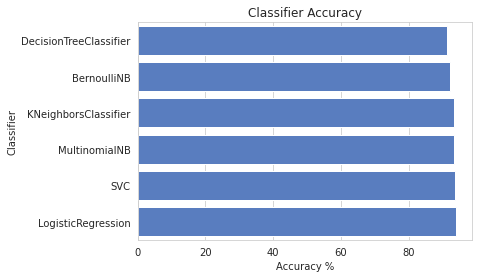

In [21]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()